<a href="https://colab.research.google.com/github/Binu315/Salary_Prediction-using-Regression/blob/main/salary_prediction_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
std_scaler= StandardScaler()
plt.style.use("ggplot")
from sklearn.model_selection import train_test_split;
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
Linear_regression_model=LinearRegression()
import statsmodels.formula.api as sm
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sal_data=pd.read_csv("/content/drive/MyDrive/salary/Salary/Salary_Data.csv")


In [ ]:
print(sal_data.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [ ]:
sal_data.shape

(6704, 6)

In [ ]:
sal_data.columns=['Age','Gender','Degree','Job_Title', 'Experience_years','Salary']

In [ ]:
sal_data.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
sal_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               6702 non-null   float64
 1   Gender            6702 non-null   object 
 2   Degree            6701 non-null   object 
 3   Job_Title         6702 non-null   object 
 4   Experience_years  6701 non-null   float64
 5   Salary            6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


<h3>Missing value handling

In [ ]:
sal_data['Age'] = sal_data['Age'].fillna(sal_data['Age'].mean())
sal_data['Experience_years'] = sal_data['Experience_years'].fillna(sal_data['Experience_years'].mean())

In [ ]:
sal_data['Gender'] = sal_data['Gender'].fillna(sal_data['Gender'].mode()[0])
sal_data['Degree'] = sal_data['Degree'].fillna('Missing')
sal_data['Job Title'] = sal_data['Job Title'].fillna('Missing')['Gender'] = sal_data['Gender'].fillna(sal_data['Gender'].mode()[0])

In [ ]:
sal_data.dropna(subset=['Salary'], inplace=True)

<h3>Data Exploration and Visualization

In [ ]:
sal_data.describe()

,Age,Experience_years,Salary
count,6699.000000,6699.000000,6699.000000
mean,33.622033,8.095014,115326.964771
std,7.615646,6.059853,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


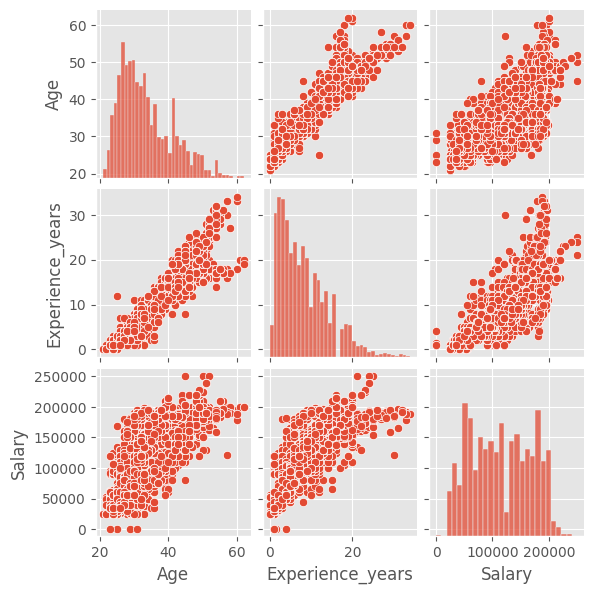

In [ ]:
sns.pairplot(sal_data, height=2)

In [ ]:
corr=sal_data[['Age','Experience_years','Salary']].corr()
corr

,Age,Experience_years,Salary
Age,1.000000,0.937694,0.728053
Experience_years,0.937694,1.000000,0.808969
Salary,0.728053,0.808969,1.000000


<Axes: >

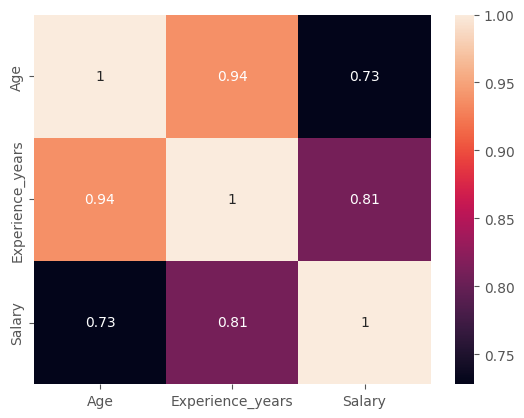

In [ ]:
sns.heatmap(corr, annot=True) #correlation matrix

<h3>Label encoding

In [ ]:
sal_data['Gender_Encode']=Label_Encoder.fit_transform(sal_data['Gender'])

In [ ]:
sal_data['Degree_Encode']=Label_Encoder.fit_transform(sal_data['Degree'])

In [ ]:
sal_data['Job_Title_Encode']=Label_Encoder.fit_transform(sal_data['Job_Title'])

In [ ]:
# Data After Label encoding
sal_data.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Job Title,Gender_Encode,Degree_Encode,Job_Title_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Male,1,0,176
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Female,0,3,18
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Male,1,6,145
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Female,0,0,116
4,52.0,Male,Master's,Director,20.0,200000.0,Male,1,3,26


In [ ]:
# Feature Scalling
sal_data['Age_scaled']= std_scaler.fit_transform(sal_data[['Age']])
sal_data['Experience_years_scaled']=std_scaler.fit_transform(sal_data[['Experience_years']])

In [ ]:
sal_data.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Job Title,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Male,1,0,176,-0.213003,-0.510779
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Female,0,3,18,-0.738277,-0.840845
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Male,1,6,145,1.494137,1.139549
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Female,0,0,116,0.312271,-0.180713
4,52.0,Male,Master's,Director,20.0,200000.0,Male,1,3,26,2.413366,1.964713


Dependent and Independent variable

In [ ]:
x=sal_data[['Age_scaled','Gender_Encode','Degree_Encode','Job_Title_Encode','Experience_years_scaled']]
y=sal_data['Salary']

In [ ]:
print(x.head());

   Age_scaled  Gender_Encode  Degree_Encode  Job_Title_Encode  \
0   -0.213003              1              0               176   
1   -0.738277              0              3                18   
2    1.494137              1              6               145   
3    0.312271              0              0               116   
4    2.413366              1              3                26   

   Experience_years_scaled  
0                -0.510779  
1                -0.840845  
2                 1.139549  
3                -0.180713  
4                 1.964713  


Spliting into test and train

In [ ]:
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42);

<h2> Linear Regression

In [ ]:
Linear_regression_model.fit(x_train,y_train)
LinearRegression()

LinearRegression()

In [ ]:
y_pred_lr=Linear_regression_model.predict(x_test)

In [ ]:
r2=r2_score(y_test, y_pred_lr)
r2

0.6908599316583021

In [ ]:
accuracy = r2_score(y_test, y_pred_lr) * 100
print(f'Accuracy of the model= {round(accuracy, 2)}%')

Accuracy of the model= 69.09%


In [ ]:
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lr)
print(f"Mean Squared Error (MSE): {mse}")
print(f" Root Mean Squared  Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 878872341.6738427
 Root Mean Squared  Error (RMSE): 29645.781178337038
Mean Absolute Error (MAE): 23538.24057123938


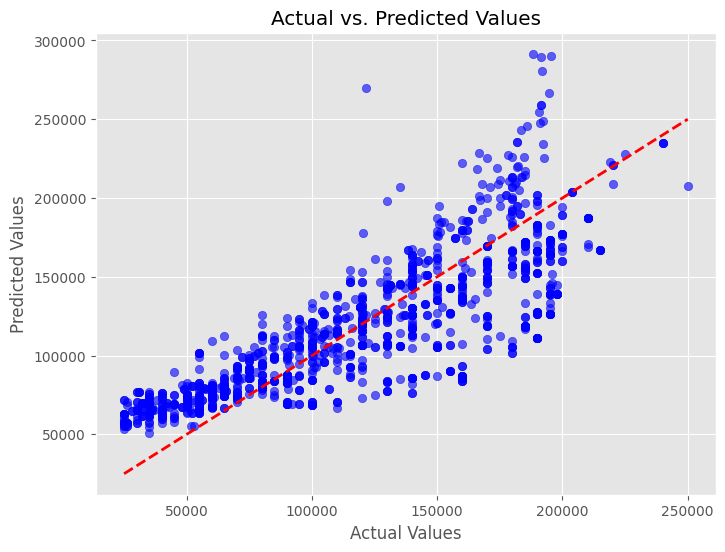

In [ ]:
y_pred_lr = Linear_regression_model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


<h2>XGboost Regressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgboost_model = XGBRegressor(random_state=42)
xgboost_model.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_lr = xgboost_model.predict(x_test)

In [ ]:
r2 = r2_score(y_test,y_pred_lr)
r2

0.9796383195429718

In [ ]:
accuracy = r2_score(y_test, y_pred_lr) * 100
print(f'Accuracy of the model= {round(accuracy, 2)}%')

Accuracy of the model= 97.96%


In [ ]:
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lr)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Squared Error (RSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 57887409.67703648
Mean Squared Error (RSE): 7608.377598216092
Mean Absolute Error (MAE): 3572.1020274603543


<h3>P value

In [ ]:
import statsmodels.formula.api as sm

model = sm.ols(formula='Salary ~ Age_scaled + Experience_years_scaled+Degree_Encode+Job_Title_Encode+Gender_Encode', data=sal_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     2741.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        03:28:22   Log-Likelihood:                -78617.
No. Observations:                6699   AIC:                         1.572e+05
Df Residuals:                    6693   BIC:                         1.573e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

In [ ]:
p_values = results.pvalues
print(p_values)
print("\nP-value for Age_scaled:", p_values['Age_scaled'])
print("\nP-value for Degree_Encode:", p_values['Degree_Encode'])
print("\nP-value for Job_Title_Encode:", p_values['Job_Title_Encode'])
print("\nP-value for Experience_years_scaled:", p_values['Experience_years_scaled'])
print("\nP-value for Gender_Encode:", p_values['Gender_Encode'])


Intercept                  0.000000e+00
Age_scaled                 2.173084e-42
Experience_years_scaled    0.000000e+00
Degree_Encode              1.231038e-29
Job_Title_Encode           1.235412e-05
Gender_Encode              4.163284e-16
dtype: float64

P-value for Age_scaled: 2.1730842585066256e-42

P-value for Degree_Encode: 1.2310375387943939e-29

P-value for Job_Title_Encode: 1.2354117313197438e-05

P-value for Experience_years_scaled: 0.0

P-value for Gender_Encode: 4.163283689324607e-16


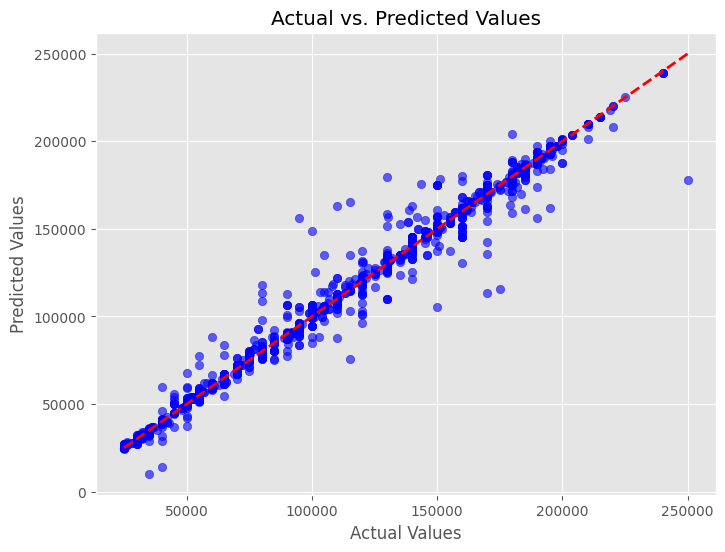

In [ ]:
y_pred_lr = xgboost_model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

<h2>Random Forest Regressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Default 100 trees
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(x_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.976424246188751

In [ ]:
print(f'Accuracy of the model= {round(r2_score(y_test, y_pred),4)*100}%')

Accuracy of the model= 97.64%


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Squared Error (RSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 67024886.38876853
Mean Squared Error (RSE): 8186.872808879379
Mean Absolute Error (MAE): 3167.452703386848


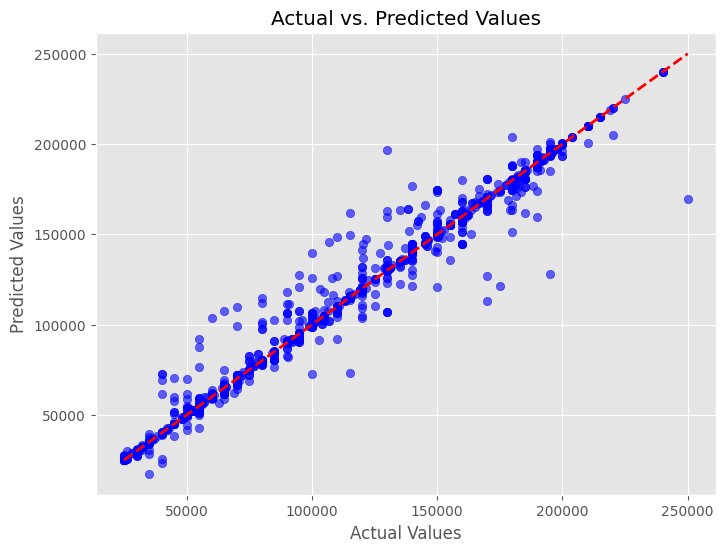

In [ ]:
y_pred_lr = rf_model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

<h2>Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Train the model
svr_model.fit(x_train, y_train)

SVR(C=100)

In [ ]:
y_pred_ir = rf_model.predict(x_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.976424246188751

In [ ]:
print(f'Accuracy of the model= {round(r2_score(y_test,y_pred_lr),4)*100}%')

Accuracy of the model= 97.64%


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 67024886.38876853
Mean Squared Error (RMSE): 8186.872808879379
Mean Absolute Error (MAE): 3167.452703386848


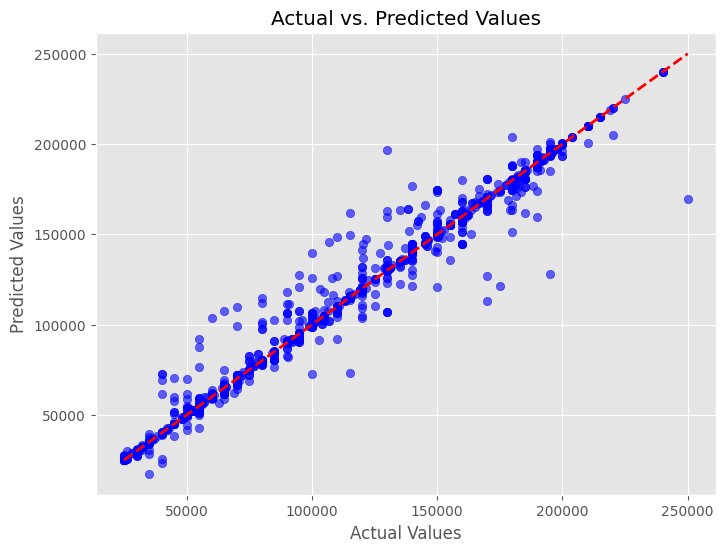

In [ ]:
y_pred_lr = rf_model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

<H2>Comparison Between 4 models

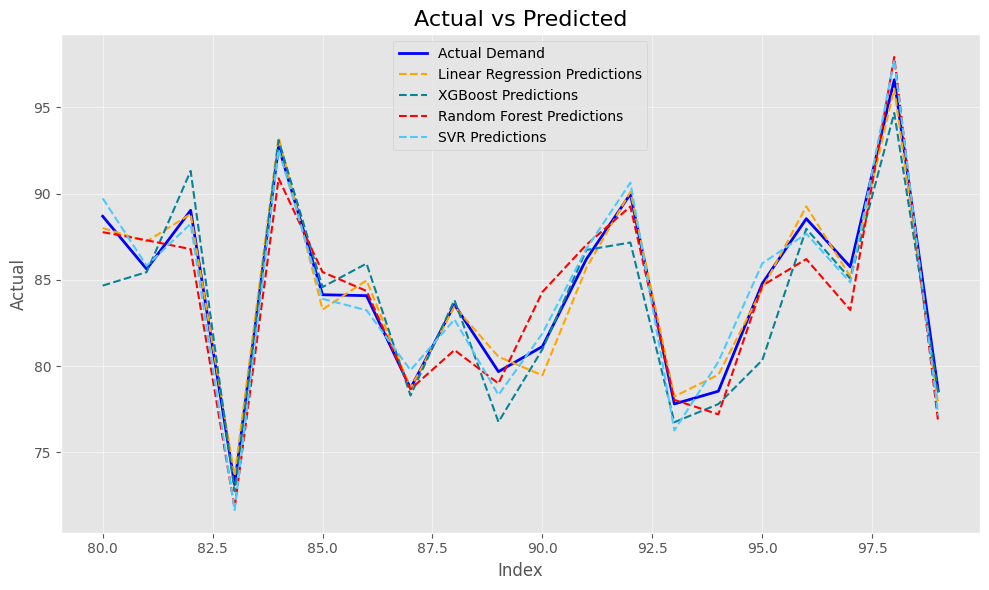

In [ ]:
indices = np.arange(80, 100)  # Example indices
y_test_subset = np.random.normal(85, 5, len(indices))  # Replace with actual y_test data
y_pred_lr_subset = y_test_subset + np.random.normal(0, 1, len(indices))  # Replace with LR predictions
y_pred_xgb_subset = y_test_subset + np.random.normal(0, 2, len(indices))  # Replace with XGBoost predictions
y_pred_rf_subset = y_test_subset + np.random.normal(0, 1.5, len(indices))  # Replace with Random Forest predictions
y_pred_svr_subset = y_test_subset + np.random.normal(0, 1.2, len(indices))  # Replace with SVR predictions

# Plot the curves
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test_subset, label="Actual Demand", color="blue", linestyle="-", linewidth=2)
plt.plot(indices, y_pred_lr_subset, label="Linear Regression Predictions", color="orange", linestyle="--", linewidth=1.5)
plt.plot(indices, y_pred_xgb_subset, label="XGBoost Predictions", color="#088395", linestyle="--", linewidth=1.5)
plt.plot(indices, y_pred_rf_subset, label="Random Forest Predictions", color="red", linestyle="--", linewidth=1.5)
plt.plot(indices, y_pred_svr_subset, label="SVR Predictions", color="#4CC9FE", linestyle="--", linewidth=1.5)

# Add labels, title, legend, and grid
plt.title("Actual vs Predicted", fontsize=16)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

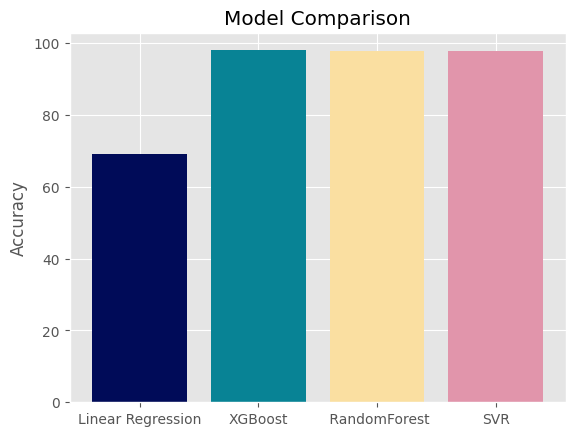

In [ ]:
models = ['Linear Regression','XGBoost',' RandomForest','SVR', ]
accuracy = [69.09, 97.96,97.64, 97.64]  # Example values
plt.bar(models, accuracy, color=['#000B58', '#088395', '#FADFA1','#E195AB'])
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.show()

<h2>Customize Predictions:

In [ ]:
sal_data.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Job Title,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Male,1,0,176,-0.213003,-0.510779
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Female,0,3,18,-0.738277,-0.840845
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Male,1,6,145,1.494137,1.139549
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Female,0,0,116,0.312271,-0.180713
4,52.0,Male,Master's,Director,20.0,200000.0,Male,1,3,26,2.413366,1.964713


Age=49 gender='Female'=0 Degree='PhD'=2 Job_Title='Director'=22 Experience_years=15 salary=?

In [ ]:
Age1=std_scaler.transform([[49]])
Age=5.86448677
Gender=0
Degree=2
Job_Title=22
Experience_years1=std_scaler.transform([[15]])
Experience_years=0.74415815

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
std_scaler.transform([[15]])[0][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1.1395492224358832

In [ ]:
Emp_salary= xgboost_model.predict([[Age,Gender,Degree,Job_Title,Experience_years]])
Emp_salary

array([130014.06], dtype=float32)

In [ ]:
print("salary of the employ with above attribute= ",Emp_salary[0])

salary of the employ with above attribute=  130014.06
